## **I am going to be using gensim library to create the Word2Vec model to analyse the stereotypes**

In [ ]:
import itertools
import pandas as pd
import numpy as np
import re
import os

from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

import nltk
nltk.download('punkt')
nltk.download('stopwords')

from gensim.models import Word2Vec
from nltk.corpus import stopwords


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Loading the input**

In [ ]:
paragraph=""" A man addresses a handful of senior army and police officers. A man modestly dressed in a suit and wearing an English 
hat looks silently out of his window. This handsome man is a Lawyer. We have to recruit some boys for intelligence unit.
He assures that his men will provide full cooperation. A man is arrested and his father came to see him. He says my son is innocent. The police man says he cannot release him but can possibly save his life. At that time a maid comes in and she quietly cleans the place. The maid is a woman. 
All the maid are woman.He looks at the girls Weak and smiles. Two young man furiously go through the inner backwater alleys. Men are strong. A woman is weak. 
But woman are beautiful. A pretty woman is reading book.That woman is beautiful. 
The soldier on duty inspects the license and other papers of the young man driving. On the passenger seat is doctor Hilaal.Doctor is a man. most man are doctor
That beautiful woman started teaching her student again. She is a teacher and teaching students. There is a woman maid in the Weak office. The maid are woman usually. She is a pretty woman.That woman was beautiful.
The three pretty girls are very beautiful. They are waiting for a taxi. A taxi comes late in night and that man who is the driver is indecisive. One pretty girl is trembling with fear. Other girl is very scared. A boys has a fight. That boy gets injured.
That boys is brought to the hospital by his friends. That boy is stubborn and doesnt want to be taken in a stretcher. the boy is stubborn and walks. 2 men came to see him. These men are the doctors and they treat the boy. The girl is extremely cautious. 
other girl is in fear. The third girl is trembling. The girl is very tense and scared. The girls dance performance is extroadinary. The girls dance is awesome. That girl dances like a godess. The girls smile is very beautiful. The girl smile attracts all.
All are fans for the girl smile. The boss of the girl is a man. The boss offer the girl drinks and girl is stubborn and  first refuses. The man boss makes her drink and the girl drinks. The neighbours says that the girl is bad because she drinks. She is bad.
The girl says society sees girl as stubborn bad. Girls are stubborn. The girl is smiling outside the window. Other girl is a dancer. The girl dance."""

**Preprocessing the data** 

In [ ]:
punc = '''!()-[]{};:'"\,<>/?@#$%^&*_~'''
for x in paragraph:
    if x in punc:
        paragraph = paragraph.replace(x, "")

text = re.sub(r'\[[0-9]*\]',' ',paragraph)
text = re.sub(r'\s+',' ',text)
text = text.lower()
text = re.sub(r'\d',' ',text)
text = re.sub(r'\s+',' ',text)
text = text.lower()

In [ ]:
sentences = nltk.sent_tokenize(text)

sentences = [nltk.word_tokenize(sentence) for sentence in sentences]

for i in range(len(sentences)):
    sentences[i] = [word for word in sentences[i] if word not in stopwords.words('english')]


## **Creating Word2Vec model**

In [ ]:
w2v_model = Word2Vec(sentences,size = 10, window=10, min_count=2, sg=1, negative=5, sample=1e-3, iter=100)
words = w2v_model.wv.vocab

#Training a model
w2v_model.train(sentences,
                total_examples=model.corpus_count,
                epochs=1001,
                report_delay=1,
                compute_loss = True
)


(39404, 300300)

In [ ]:
vector = model.wv['man']
vector2 = model.wv['woman']
vector3 = model.wv['girl']
print(vector)
print(vector2)
print(vector3)

[-0.04777881 -0.0140576  -0.04348908  0.00717288 -0.03064879  0.00678047
 -0.04059371  0.0236368   0.01384971  0.04876829]
[-0.02274369  0.04864734  0.00326971 -0.00068767 -0.00006826  0.039667
 -0.02141798 -0.03846537 -0.025322   -0.00613852]
[-0.02368134 -0.02762997 -0.04090045 -0.04140757  0.03024737 -0.00830795
 -0.03119605 -0.00476144 -0.02656542 -0.02234309]


## **Visualising the model**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


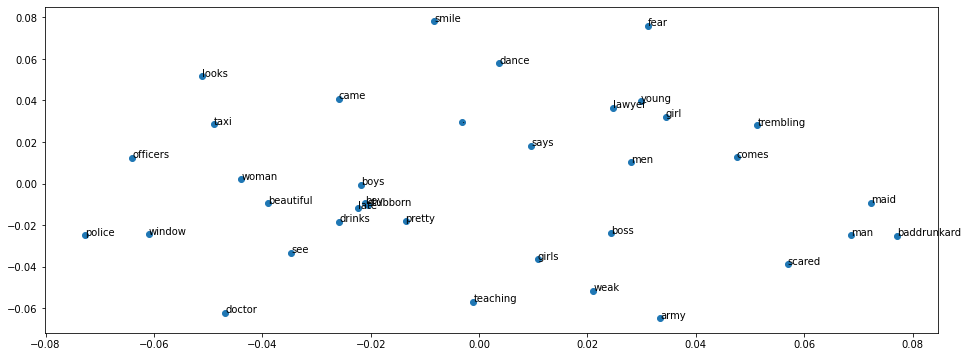

In [ ]:
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.figure(figsize=(16,6))
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

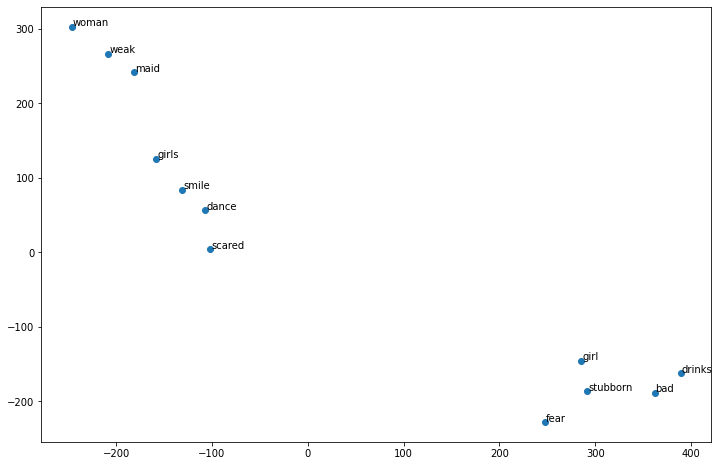

In [ ]:
similar_words = {search_term: [item[0] for item in w2v_model.wv.most_similar([search_term], topn=5)]
                  for search_term in ['girls','girl']}

from sklearn.manifold import TSNE

words = sum([[k] + v for k, v in similar_words.items()], [])
wvs = w2v_model.wv[words]

tsne = TSNE(n_components=2, random_state=2, n_iter=1000, perplexity=2)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(12, 8))
plt.scatter(T[:, 0], T[:, 1])
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')